# Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [47]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

# Data visualisation

import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

import seaborn as sns
# Set plot style
sns.set(color_codes=True)

from scipy import stats

# Dates
from datetime import datetime

#remove warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [48]:
# load data
df = pd.read_csv('./Online_Retail_1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [49]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [50]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [51]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [52]:
# Remove unnecessary columns
df = df.drop(['InvoiceNo', 'StockCode'], axis=1)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [53]:
# check for missing values
df.isnull().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [54]:
#Drop rows with missing valiues (customer ID and description) and place it in a new variable "df_cleaned"
df_cleaned = df.dropna()
df_cleaned

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [55]:
#Identify duplicates
df_cleaned.duplicated().sum()

5301

In [56]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [57]:
# Convert InvoiceDate to datetime
df_cleaned.loc[:,'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')
df_cleaned.loc[:,'InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401528, dtype: datetime64[ns]

In [58]:
# Check for any rows with invalid dates
invalid_dates = df_cleaned['InvoiceDate'].isnull().sum()
print(invalid_dates)

0


In [59]:
# Create a new column for total price
df_cleaned.loc[:, 'TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned.loc[:, 'TotalPrice'] 

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 401528, dtype: float64

In [60]:
# Total sales over time
sales_over_time = df_cleaned.resample('M', on='InvoiceDate')['TotalPrice'].sum()
print(sales_over_time)

InvoiceDate
2010-12-31     552315.160
2011-01-31     473659.300
2011-02-28     435531.570
2011-03-31     578533.910
2011-04-30     425217.671
2011-05-31     646905.470
2011-06-30     606861.270
2011-07-31     572192.571
2011-08-31     615068.090
2011-09-30     929141.582
2011-10-31     973201.140
2011-11-30    1126757.820
2011-12-31     341519.530
Freq: M, Name: TotalPrice, dtype: float64


STATISTICS SUMMARY AND MEASURES OF CENTRAL TENDENCY AND DISPERSION

In [14]:
# Summary statistics for Quantity, UnitPrice, and InvoiceDate
summary_stats = df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']].describe()
summary_stats

,Quantity,UnitPrice,TotalPrice
count,401528.000000,401528.000000,401528.000000
mean,12.183723,3.474295,20.613519
std,250.306467,69.770623,430.390504
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


In [64]:
# Display descriptive summary statistics for non-numeric columns
non_numeric_summary_stats = df_cleaned.describe(include=['O'])  # 'O' stands for object columns
non_numeric_summary_stats

,Description,Country
count,401528,401528
unique,3896,37
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2058,356655


VISUALIZATIONS

In [87]:
top_customers = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_customers

,CustomerID,TotalPrice
0,14646.0,279489.02
1,18102.0,255522.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
5,14156.0,113214.59
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62690.54
9,15311.0,59284.19


In [88]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

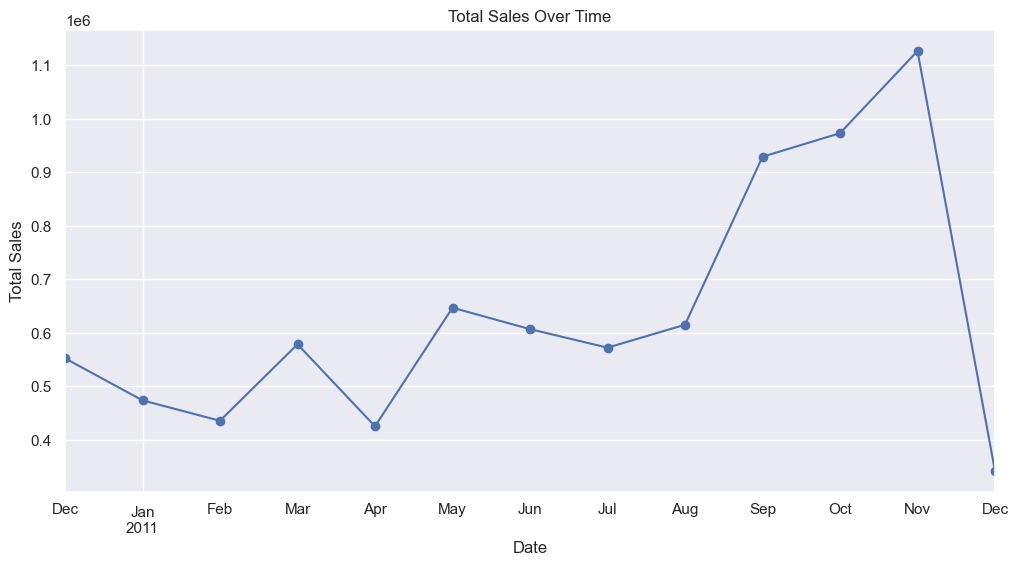

In [89]:
# Time Series Plot: Sales over time
plt.figure(figsize=(12, 6))
sales_over_time.plot( marker = "o", linestyle = "-", color = "b")
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

CUSTOMER ANALYSIS

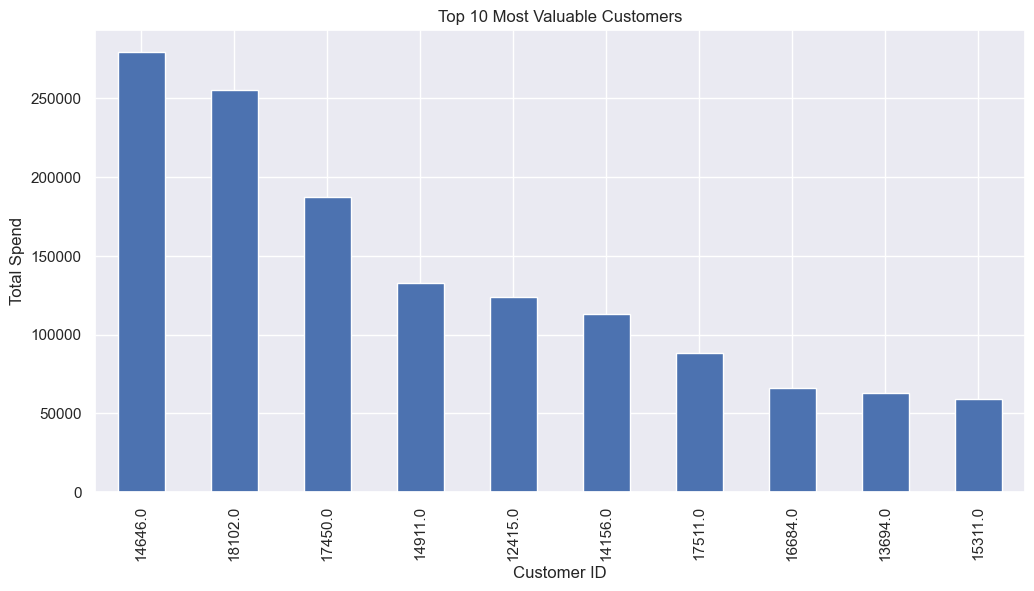

In [92]:
# Most valuable customers
customer_value = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
customer_value.plot(kind='bar')
plt.title('Top 10 Most Valuable Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()

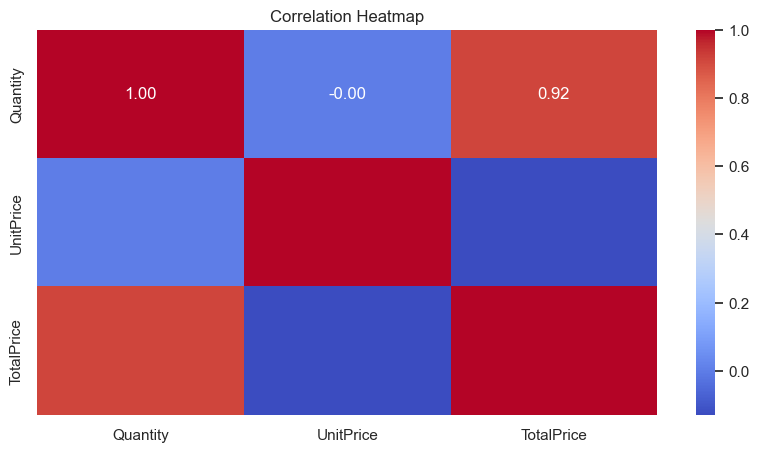

In [470]:
# Correlation Heatmap
plt.figure(figsize=(10, 5))
corr = df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Sales Trends Analysis

In [471]:
# Split InvoiceDate into Date and Time
df_cleaned.loc[:,'Date'] = df_cleaned['InvoiceDate'].dt.date
df_cleaned.loc[:,'Time'] = df_cleaned['InvoiceDate'].dt.time
df_cleaned.loc[:,'Date'], df_cleaned.loc[:,'Time']

(0         2010-12-01
 1         2010-12-01
 2         2010-12-01
 3         2010-12-01
 4         2010-12-01
              ...    
 541904    2011-12-09
 541905    2011-12-09
 541906    2011-12-09
 541907    2011-12-09
 541908    2011-12-09
 Name: Date, Length: 401528, dtype: object,
 0         08:26:00
 1         08:26:00
 2         08:26:00
 3         08:26:00
 4         08:26:00
             ...   
 541904    12:50:00
 541905    12:50:00
 541906    12:50:00
 541907    12:50:00
 541908    12:50:00
 Name: Time, Length: 401528, dtype: object)

In [70]:
#Extract month and year
df_cleaned.loc[:,'Year'] = df_cleaned.loc[:,'InvoiceDate'].dt.year
df_cleaned.loc[:,'Month'] = df_cleaned.loc[:,'InvoiceDate'].dt.strftime('%b')
df_cleaned.loc[:,'DayOfWeek'] = df_cleaned.loc[:,'InvoiceDate'].dt.strftime('%A')
df_cleaned.loc[:,'Year'], df_cleaned.loc[:,'Month'], df_cleaned.loc[:,'DayOfWeek']

(0         2010
 1         2010
 2         2010
 3         2010
 4         2010
           ... 
 541904    2011
 541905    2011
 541906    2011
 541907    2011
 541908    2011
 Name: Year, Length: 401528, dtype: int32,
 0         Dec
 1         Dec
 2         Dec
 3         Dec
 4         Dec
          ... 
 541904    Dec
 541905    Dec
 541906    Dec
 541907    Dec
 541908    Dec
 Name: Month, Length: 401528, dtype: object,
 0         Wednesday
 1         Wednesday
 2         Wednesday
 3         Wednesday
 4         Wednesday
             ...    
 541904       Friday
 541905       Friday
 541906       Friday
 541907       Friday
 541908       Friday
 Name: DayOfWeek, Length: 401528, dtype: object)

In [71]:
# Group by Year and Month and calculate total sales
monthly_sales = df_cleaned.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales

,Year,Month,TotalPrice
0,2010,Dec,552315.160
1,2011,Apr,425217.671
2,2011,Aug,615068.090
3,2011,Dec,341519.530
4,2011,Feb,435531.570
5,2011,Jan,473659.300
6,2011,Jul,572192.571
7,2011,Jun,606861.270
8,2011,Mar,578533.910
9,2011,May,646905.470


In [72]:
# Pivot the data for heatmap
monthly_sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='TotalPrice').fillna(0)
monthly_sales_pivot

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2010,0.000,0.00,552315.16,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.000
2011,425217.671,615068.09,341519.53,435531.57,473659.3,572192.571,606861.27,578533.91,646905.47,1126757.82,973201.14,929141.582


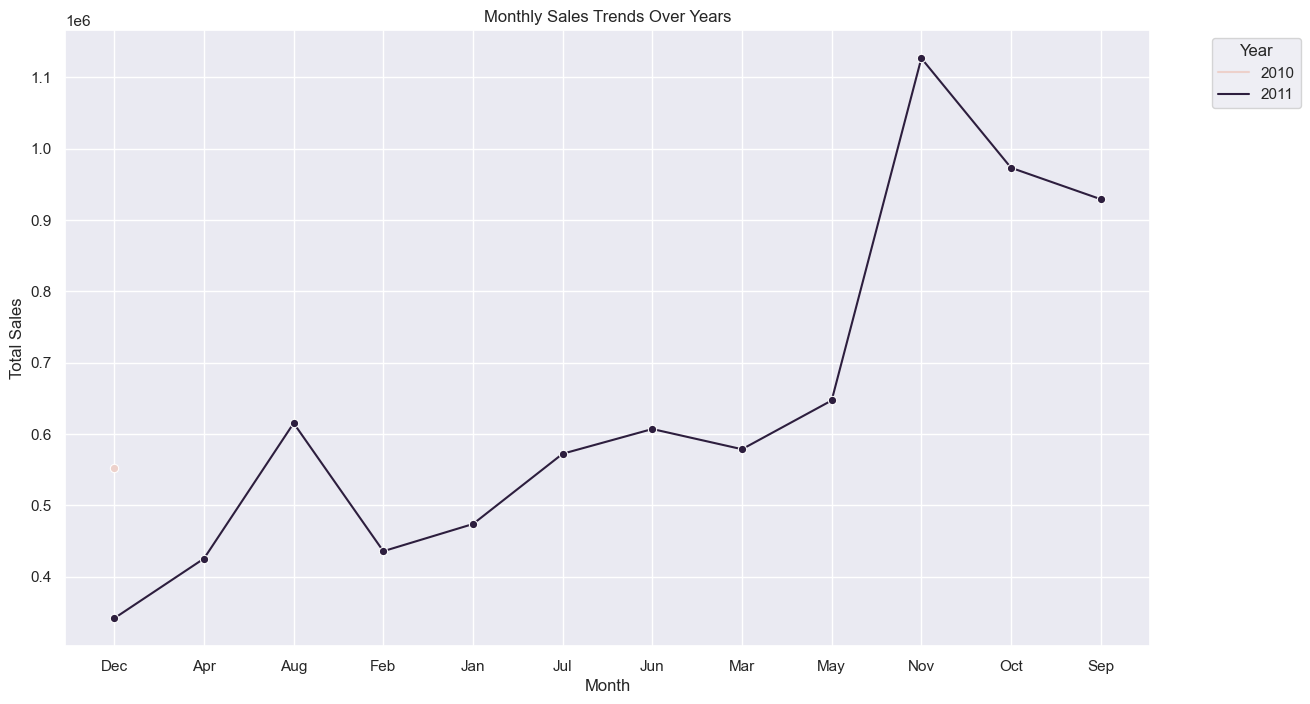

In [81]:
 # Line Plot: Monthly Sales Trends over Years
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

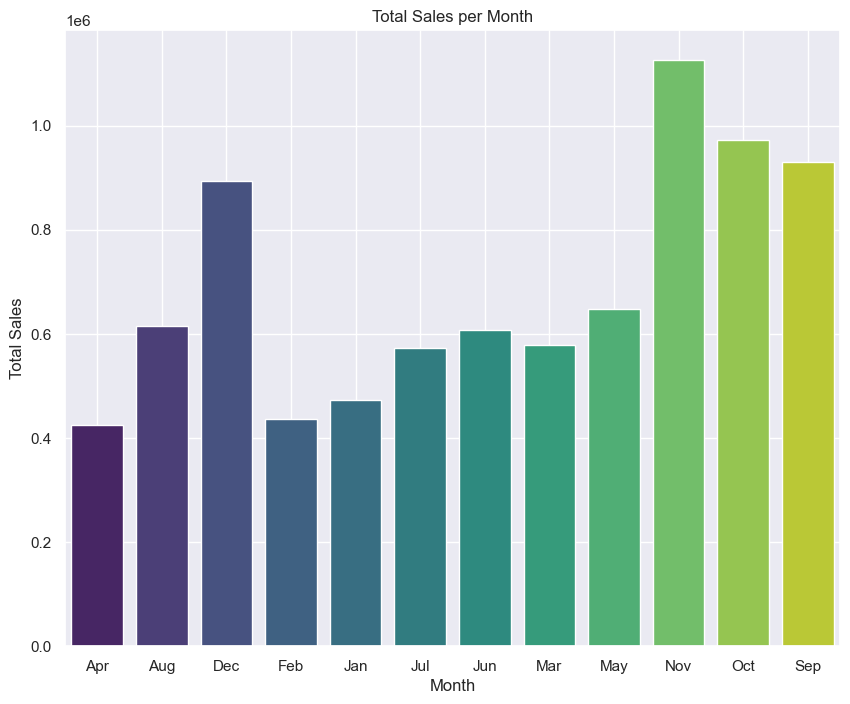

In [77]:
# Bar Plot: Total Sales per Month
monthly_sales_total = df_cleaned.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(data=monthly_sales_total, x='Month', y='TotalPrice', palette='viridis')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

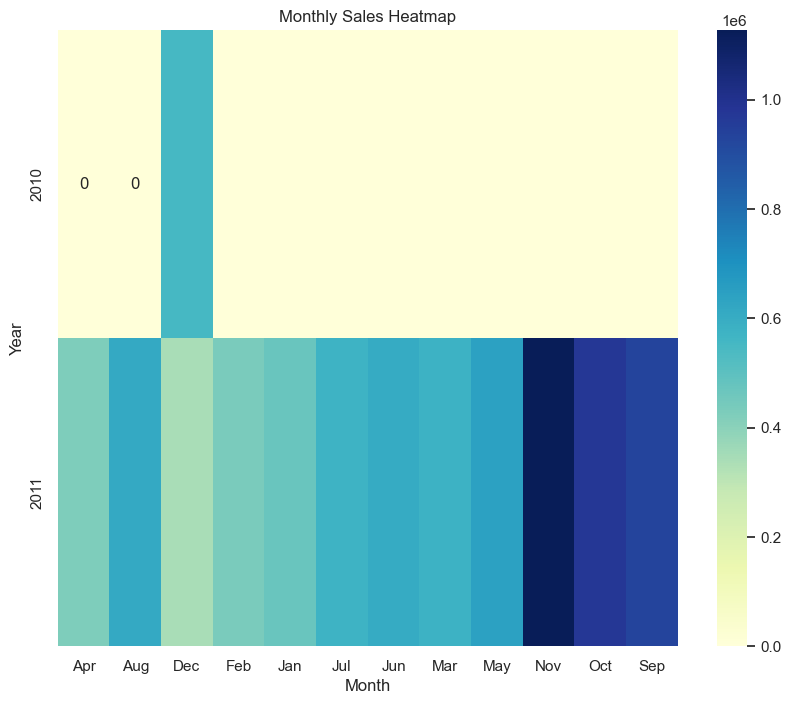

In [78]:
# Heatmap: Monthly Sales Over Years
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_sales_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

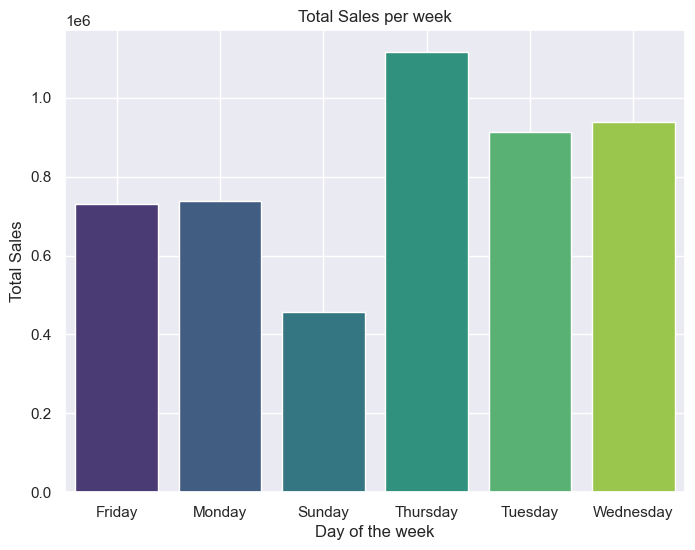

In [79]:
weekly_sales_total = df_cleaned.groupby('DayOfWeek')['Quantity'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=weekly_sales_total, x='DayOfWeek', y='Quantity', palette='viridis')
plt.title('Total Sales per week')
plt.xlabel('Day of the week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [82]:
# Top 10 selling products based on quantity sold
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
top_products

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
1,JUMBO BAG RED RETROSPOT,44963
2,ASSORTED COLOUR BIRD ORNAMENT,35215
3,WHITE HANGING HEART T-LIGHT HOLDER,34128
4,PACK OF 72 RETROSPOT CAKE CASES,33386
5,POPCORN HOLDER,30488
6,RABBIT NIGHT LIGHT,27045
7,MINI PAINT SET VINTAGE,25880
8,PACK OF 12 LONDON TISSUES,25305
9,PACK OF 60 PINK PAISLEY CAKE CASES,24129


In [20]:
# Top-selling countries based on quantity sold
top_countries = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries

,Country,Quantity
0,United Kingdom,3994154
1,Netherlands,200128
2,EIRE,136187
3,Germany,117340
4,France,109806
5,Australia,83643
6,Sweden,35632
7,Switzerland,29778
8,Spain,26817
9,Japan,25218


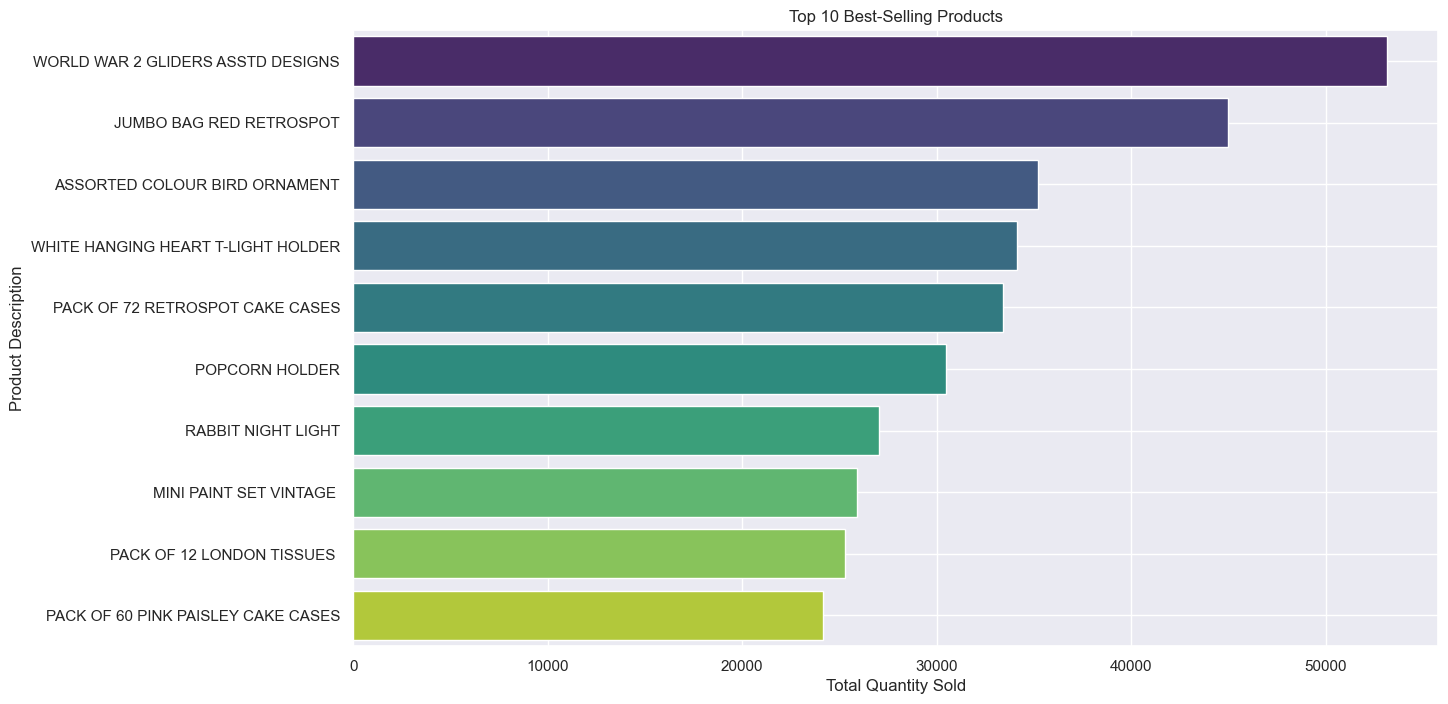

In [26]:
# Bar Plot: Top-selling products
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='Quantity', y='Description', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.grid(True)
plt.show()

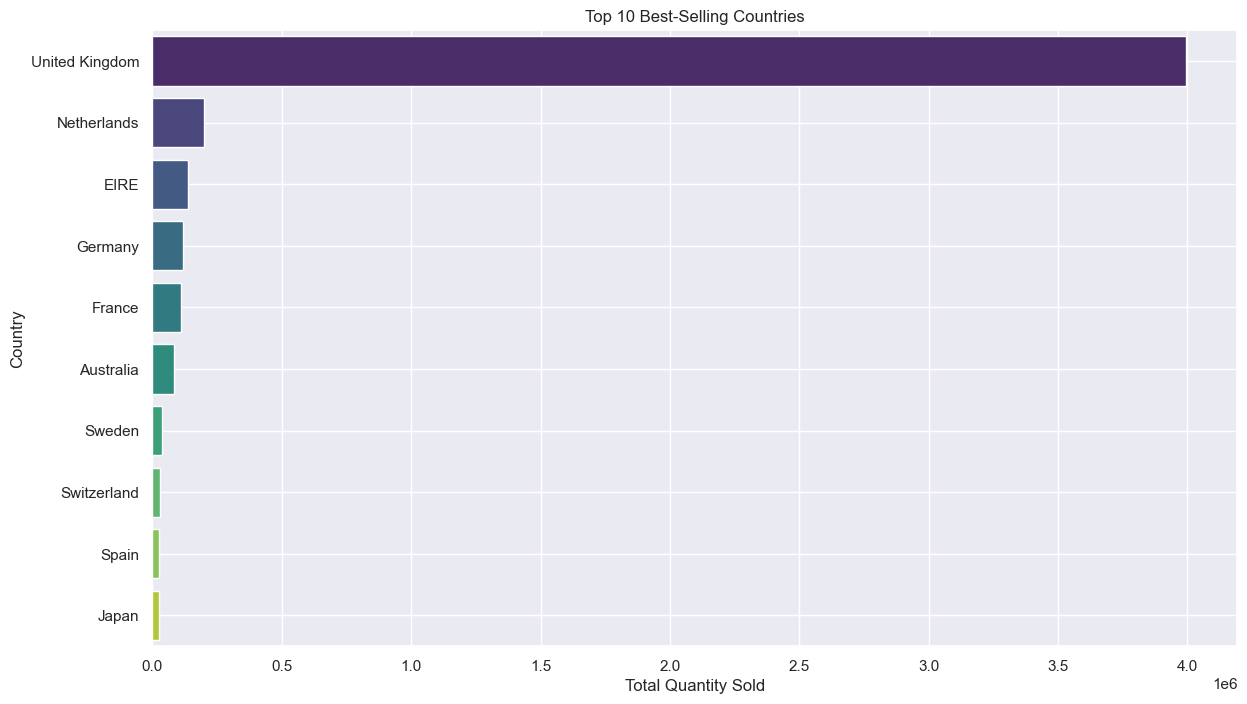

In [22]:
# Bar Plot: Top-selling countries
plt.figure(figsize=(14, 8))
sns.barplot(data=top_countries, x='Quantity', y='Country', palette='viridis')
plt.title('Top 10 Best-Selling Countries')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.grid(True)
plt.show()

OUTLIER DETECTION

In [482]:
# Box Plot: Detect Outliers in Quantity and UnitPrice
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Box Plot for Quantity')

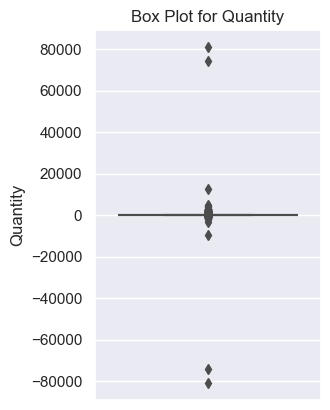

In [483]:
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, y='Quantity')
plt.title('Box Plot for Quantity')

Text(0.5, 1.0, 'Box Plot for UnitPrice')

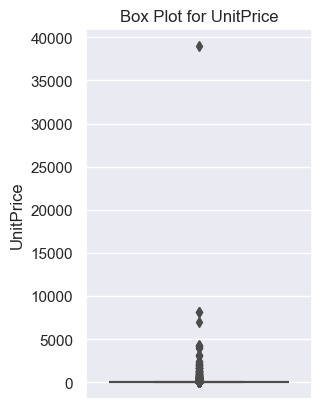

In [484]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, y='UnitPrice')
plt.title('Box Plot for UnitPrice')

In [485]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [28]:
# Z-score method to detect outliers
df_cleaned.loc[:,'Quantity_Z'] = stats.zscore(df_cleaned['Quantity'])
df_cleaned.loc[:,'UnitPrice_Z'] = stats.zscore(df_cleaned['UnitPrice'])
df_cleaned.loc[:,'Quantity_Z'], df_cleaned.loc[:,'UnitPrice_Z']

(0        -0.024705
 1        -0.024705
 2        -0.016714
 3        -0.024705
 4        -0.024705
             ...   
 541904   -0.000734
 541905   -0.024705
 541906   -0.032695
 541907   -0.032695
 541908   -0.036690
 Name: Quantity_Z, Length: 401528, dtype: float64,
 0        -0.013248
 1        -0.001208
 2        -0.010381
 3        -0.001208
 4        -0.001208
             ...   
 541904   -0.037613
 541905   -0.019697
 541906    0.009685
 541907    0.009685
 541908    0.021151
 Name: UnitPrice_Z, Length: 401528, dtype: float64)

In [29]:
# Define outliers based on Z-score
quantity_outliers = df_cleaned[df_cleaned['Quantity_Z'].abs() > 3]
unitprice_outliers = df_cleaned[df_cleaned['UnitPrice_Z'].abs() > 3]
quantity_outliers, unitprice_outliers 

(                                Description  Quantity         InvoiceDate  \
 4287    ROTATING SILVER ANGELS T-LIGHT HLDR     -9360 2010-12-02 14:23:00   
 4850         ASSORTED COLOUR T-LIGHT HOLDER      1824 2010-12-02 16:48:00   
 4945      WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880 2010-12-02 17:38:00   
 4946                 RED  HARMONICA IN BOX       1400 2010-12-02 17:38:00   
 6365                  ASSORTED INCENSE PACK      1440 2010-12-03 11:48:00   
 ...                                     ...       ...                 ...   
 537883             BLACK RECORD COVER FRAME       960 2011-12-08 12:36:00   
 540070                       POPCORN HOLDER      1500 2011-12-08 18:45:00   
 540071                       POPCORN HOLDER      1200 2011-12-08 18:46:00   
 540421          PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   
 540422          PAPER CRAFT , LITTLE BIRDIE    -80995 2011-12-09 09:27:00   
 
         UnitPrice  CustomerID         Country  TotalPrice  Qu

In [30]:
print(f'Number of Quantity Outliers: {quantity_outliers.shape[0]}')
print(f'Number of UnitPrice Outliers: {unitprice_outliers.shape[0]}')

Number of Quantity Outliers: 185
Number of UnitPrice Outliers: 149


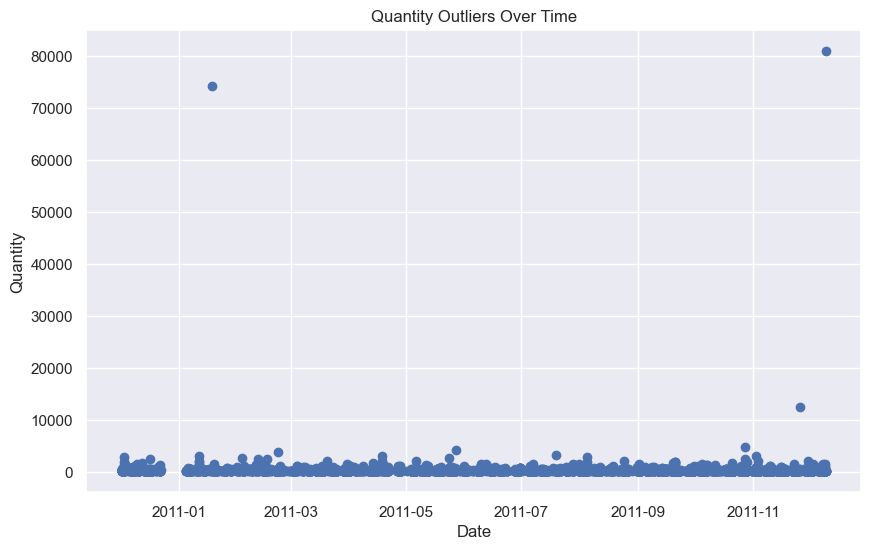

In [93]:
# Detect outliers in Quantity
quantity_outliers = df_cleaned[df_cleaned['Quantity'] > df_cleaned['Quantity'].quantile(0.99)]
plt.figure(figsize=(10, 6))
plt.scatter(quantity_outliers['InvoiceDate'], quantity_outliers['Quantity'])
plt.title('Quantity Outliers Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()